## YouTube Channel Rank Analysis

Team Project - CIS 591

## Problem Statement
Our dataset is the top 1000 channels on YouTube, ranked by number of subscribers. In addition to subscriber count, we also have the following data for each channel: Video Views; Video Count; Category; Start Date.  From this data, we want to ascertain what helped channels rise to the top and what correlations are there between types of data. In conjunction with a general knowledge of how YouTube monetizes and other content trends, we hope to be able to provide a “marketplace environmental study”, showing where successful YouTubers come from, what outliers exist, and how one might be able to most successfully start a channel of their own, and maybe reach that top list themselves.

Overall, our problem statement is:
What are the major factors that highly successful YouTube content creators have in common? What correlations are found between different factors? How can we use this knowledge to set up other YouTubers for success?


Dataset
In our data, we have the following columns and data types:
- Rank: rank of the channel by number of subscribers they have (numerical, int)
- Youtuber: official channel name (categorical, string)
- Subscriber: number of subscribers per channel (numerical, int)
- Video Views: number for which all videos have been watched collectively (numerical, int)
- Video Count: number of video channels has uploaded so far (numerical, int)
- Category: category and genre of the channel (categorical, string)
- Start Date: year when the channel started (numerical, date)

This data was collected by the user surajjha101 on the data repository Kaggle. All data is used in accordance with the Open Data Commons Public Domain Dedication and License v1.0. It was last updated in 2022, so unfortunately this will be an out of date analysis. However, this period does include two years of the COVID-19 pandemic era, which is well known to have had major impacts across many industries, including the content creation and consumption spaces.


Pseudocode Question 1


What is the ratio of subscribers to video views for each channel? What does this ratio indicate?

1.   Import the pandas library as pd
2.   Load the dataset using the read_csv() function to load the YouTube channels data into a DataFrame named df.
3. Display the dataframe
4. Display Column names
5. Convert subscribers column to numeric.
6. Convert Video Views to column
7. Calculate Subscribers to views ratio
8. Filter specific columns to cointain the following columns: Rank, YouTuber, Subscribrs, Videw Views, and Subscribers to viewer ratio.
9. Display the filtered Data Frame




In [ ]:
import pandas as pd

df=pd.read_csv('/content/sample_data/most_subscribed_youtube_channels.csv')
print(df)

In [ ]:
print(df.columns)

In [ ]:
df['Subscribers'] = pd.to_numeric(df['Subscribers'].astype(str).str.replace(',',''), errors = 'coerce')
df['Video views'] = pd.to_numeric(df['Video views'].astype(str).str.replace(',',''),errors = 'coerce')

df['subscribers_to_views_ratio'] = df['Subscribers'] / df['Video views']
df_filtered = df[['Rank', 'Youtuber', 'Subscribers', 'Video views', 'subscribers_to_views_ratio']]
print(df_filtered)

# Pseudocode, Question 2
### Is there a trend showing that channels with more frequent video uploads achieve higher ranks?
1. Load the dataset containing channel information (including upload frequency and rank).
2. For each channel:
a. Extract the total number of videos uploaded.
b. Determine the channel inception date (i.e., the date or year the channel was created).
c. Calculate the number of years since the channel's inception (Current Year - Inception Year).
d. Calculate the average number of uploads per year by dividing the total number of videos by the number of years since inception.
3.Extract the rank of each channel from the dataset.
Filter top ranked channels and count category representation in top channels.
Sort categories based on the number of channels and identify which categories dominate those ranks.
Analyze traffic by category by grouping data by category and summing viewers by category.
4. Perform correlation analysis between the average video uploads per year (calculated in Step 2d) and the rank of each channel.
5. Output the correlation result to check for any significant trend (positive or negative).
6. Visualize the trend using a scatter plot or line graph, with:
X-axis: Average uploads per year.
Y-axis: Channel rank.
7. Interpret the results to determine if there's a noticeable trend where channels with more frequent uploads tend to have higher ranks.


Correlation coefficient between average uploads per year and channel rank: -0.047159197642136275
P-value of the correlation: 0.13615358294653812


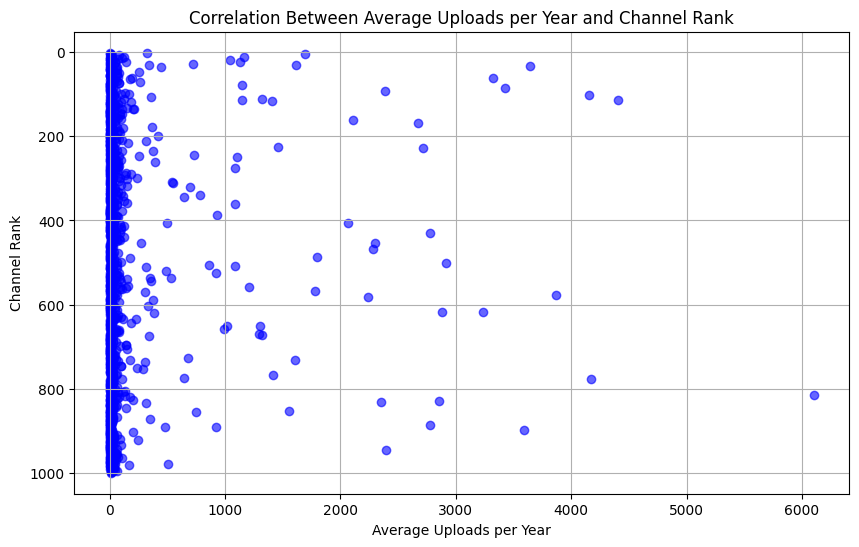

There is no statistically significant correlation between upload frequency and rank.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Load the dataset from the Excel file
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Step 2: For each channel
# a. Extract the total number of videos uploaded (assuming your dataset has a 'Video count' column)
# Adjust this column name based on your dataset structure
df['total_videos'] = df['Video count']  # Replace with the correct column name from your dataset

# b. Determine the channel inception date (assuming your dataset has a 'Started' column)
# Ensure the 'Started' is treated as a datetime object
df['inception_year'] = pd.to_datetime(df['Started'], errors='coerce').dt.year

# c. Calculate the number of years since the channel's inception
current_year = pd.Timestamp.now().year
df['years_since_inception'] = current_year - df['inception_year']

# d. Calculate the average number of uploads per year
df['avg_uploads_per_year'] = df['total_videos'] / df['years_since_inception']

# Step 3: Extract the rank of each channel (assuming your dataset has a 'Rank' column)
df['rank'] = df['Rank']

# Filter top-ranked channels and count category representation
# Assuming you have a 'Category' column, adjust as necessary
df_top_channels = df[df['rank'] <= 100]  # Filter for top 100 channels
category_counts = df_top_channels['Category'].value_counts()

# Group data by category and sum viewers for each category
# Assuming you have 'Video views' and 'Category' columns
traffic_by_category = df.groupby('Category')['Video views'].sum()

# Step 4: Perform correlation analysis between the average video uploads per year and rank
corr, p_value = pearsonr(df['avg_uploads_per_year'], df['rank'])

# Output the correlation result
print(f"Correlation coefficient between average uploads per year and channel rank: {corr}")
print(f"P-value of the correlation: {p_value}")

# Step 5: Visualize the trend using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_uploads_per_year'], df['rank'], alpha=0.6, color='b')
plt.title('Correlation Between Average Uploads per Year and Channel Rank')
plt.xlabel('Average Uploads per Year')
plt.ylabel('Channel Rank')
plt.gca().invert_yaxis()  # Invert y-axis since lower ranks are better (1 is the best rank)
plt.grid(True)
plt.show()

# Interpretation of Results
if p_value < 0.05:
    print("There is a statistically significant correlation between upload frequency and rank.")
else:
    print("There is no statistically significant correlation between upload frequency and rank.")



# Pseudocode, Question 3

**Part 1: Extract rank of each channel from dataset**

1. Input Excel data from channels
2. Define criteria for top-ranked channels
3. Filter channels by rank

**Part 2: Filter top ranked channels and count category representation in top channels**


1.   Create a dictionary to store the count of categories
2.   Output count by each category


**Part 3: Find outliers and the categories that seem to dominate the ranks**


1.   Calculate the mean and standard deviation of category representation
2.   Find the outlier categories, categories that are more than 2 standard deviations above the mean
3.   For each category, count category results
4.   Output dominating categories

**Part 4: Find the categories that receive the most traffic from viewers**
1.  Create a dictionary to store the total views per category
2.  Sort categories by total views in descending order to find categories receiving the most traffic
3.  Output sorted categories views














In [ ]:
import pandas as pd

# Load the dataset from the excel file
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Count the representation of each category in the dataset
category_counts = df['Category'].value_counts()

# Print the category counts
print("Top Categories by Representation:")
print(category_counts)w


Top Categories by Representation:
Category
Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Define a threshold for top-ranked channels, e.g., top 50
top_ranked_threshold = 50

# Filter the top-ranked channels based on the 'Rank' column
top_ranked_channels = df[df['Rank'] <= top_ranked_threshold]

# Count the category representation in the top-ranked channels
top_category_counts = top_ranked_channels['Category'].value_counts()

# Convert the category counts into a dictionary
category_count_dict = top_category_counts.to_dict()

# Output the count by each category
print("Category Representation in Top Ranked Channels:")
for category, count in category_count_dict.items():
    print(f"{category}: {count} channels")

Category Representation in Top Ranked Channels:
Music: 18 channels
Entertainment: 6 channels
Education: 5 channels
Film & Animation: 4 channels
Shows: 3 channels
Gaming: 3 channels
People & Blogs: 3 channels
Sports: 2 channels
Howto & Style: 2 channels
News & Politics: 1 channels


In [ ]:
import pandas as pd

# Load the dataset from the provided file
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Group the data by 'Category' and sum the 'Video views'
category_traffic = df.groupby('Category')['Video views'].sum().sort_values(ascending=False)

# Get the top 10 categories by video views
top_10_categories = category_traffic.head(10)

# Output the top 10 categories
print("Top 10 Categories Receiving the Most Traffic (Video Views):")
for category, views in top_10_categories.items():
    print(f"{category}: {views:,} views")

Top 10 Categories Receiving the Most Traffic (Video Views):
Music: 2,906,210,355,935 views
Entertainment: 2,065,614,675,162 views
People & Blogs: 902,223,827,281 views
Gaming: 666,609,775,197 views
Education: 597,612,585,217 views
Film & Animation: 492,007,180,389 views
Shows: 383,341,349,652 views
Comedy: 329,552,696,633 views
News & Politics: 240,950,534,839 views
Howto & Style: 187,329,391,542 views


Top 10 Categories Receiving the Most Traffic (Video Views):
Music: 2,906,210,355,935 views
Entertainment: 2,065,614,675,162 views
People & Blogs: 902,223,827,281 views
Gaming: 666,609,775,197 views
Education: 597,612,585,217 views
Film & Animation: 492,007,180,389 views
Shows: 383,341,349,652 views
Comedy: 329,552,696,633 views
News & Politics: 240,950,534,839 views
Howto & Style: 187,329,391,542 views


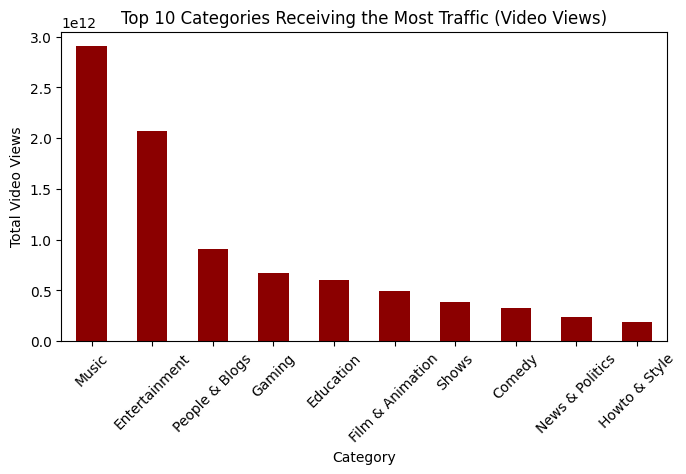

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided file
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Group the data by 'Category' and sum the 'Video views'
category_traffic = df.groupby('Category')['Video views'].sum().sort_values(ascending=False)

# Get the top 10 categories by video views
top_10_categories = category_traffic.head(10)

# Output the top 10 categories
print("Top 10 Categories Receiving the Most Traffic (Video Views):")
for category, views in top_10_categories.items():
    print(f"{category}: {views:,} views")

# Plot a bar chart for the top 10 categories by video views
plt.figure(figsize=(7,5))
top_10_categories.plot(kind='bar', color='darkred')
plt.title('Top 10 Categories Receiving the Most Traffic (Video Views)')
plt.xlabel('Category')
plt.ylabel('Total Video Views')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()

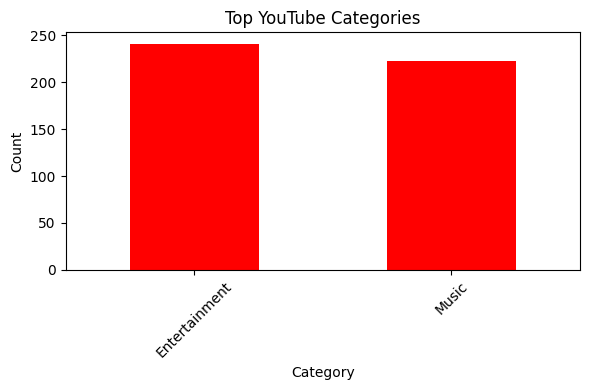

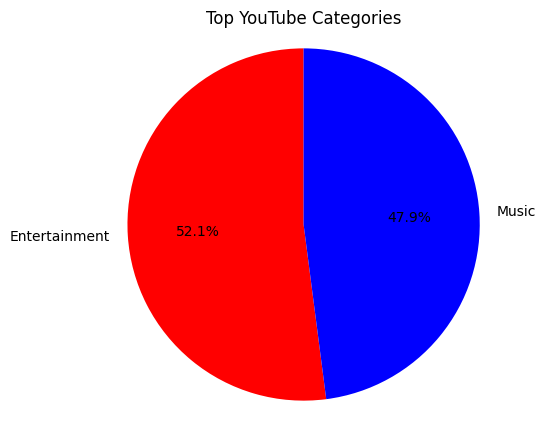

In [ ]:

# Load the Excel file
file_path = '/content/sample_data/Project Dataset (1).xlsx'
xls = pd.ExcelFile(file_path)

# Load the dataset from the sheet
df = pd.read_excel(xls, 'Project Dataset.csv')

# Filter out rows where Category is empty
df_clean = df.dropna(subset=['Category'])

# Calculate the count of categories
category_counts = df_clean['Category'].value_counts()

# Calculate mean and standard deviation of category representation
mean_category_count = category_counts.mean()
std_category_count = category_counts.std()

# Find the outlier categories (more than 2 standard deviations above the mean)
outlier_threshold = mean_category_count + 2 * std_category_count
outlier_categories = category_counts[category_counts > outlier_threshold]

# Output the dominating categories (those with counts more than the threshold)
dominating_categories = outlier_categories

# Bar graph for dominating categories
plt.figure(figsize=(6, 4))
dominating_categories.plot(kind='bar', color='red')
plt.title('Top YouTube Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for dominating categories
plt.figure(figsize=(5, 5))
plt.pie(dominating_categories, labels=dominating_categories.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Top YouTube Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Pseudocode, Question 4
Does the age of the channel have any impact on the rank of a channel? Does category factor into this?
1. Read in Excel channel data to data frame
2. Store channel data and format into correct data types
3. Run correlation analysis between channel rank and date of first upload
Analyze to determine if older channels are always ranked higher, are more likely to be higher, or if no correlation
4.  Reperform correlation to account for category: group all channels by category, then plot correlation between date and rank
	Analyze to determine the age trends within categories, if any
5. Assess strength of both measures, and determine if one is stronger than the other, or if there seems to be no strong correlation between either sets
6. Plot graphs for presentation


In [ ]:
def age_calc(col):
    return 2022 - col['started']

# Read in data
total_dataset = pd.read_csv("most_subscribed_youtube_channels.csv")

# Transform data into correct types
total_dataset['started'] = total_dataset['started'].astype(int)

# Add column for age in years to prep analysis
total_dataset.loc[:,'Age (years)'] = total_dataset.apply(age_calc, axis=1)

# Clean outliers
q = total_dataset['Age (years)'].quantile(0.99)
for x,i in enumerate(total_dataset['Age (years)']):
    if i > q:
        total_dataset.loc[x,'Age (years)'] = None

# Pearson correlation between rank and age
pearsons = {}
pearson_rank_age = PR(total_dataset['rank'],total_dataset['Age (years)'])
pearsons['Overall'] = (pearson_rank_age[0], pearson_rank_age[1])
total_dataset.to_excel("AgebyRank.xlsx",index=False)

fig1 = px.scatter(total_dataset, x='rank', y='Age (years)', title=f'Rank by Age in Years, Slope: {round(pearson_rank_age[0],5)}, P-value: {round(pearson_rank_age[1],5)}', trendline='ols', trendline_color_override='rgb(230,100,0)')
#fig1.show()
fig2 = px.scatter(total_dataset, x='rank', y='Age (years)', title='Rank by Age with Categories', color='category')#rendline='ols', trendline_color_override='rgb(230,100,0)')
#fig2.show()

# Group by category, and rerun Pearson R for each
cats = total_dataset.groupby('category')
for name, grp in cats:
    if len(grp) >=10: # choose minimum number of data points
        temp_R = PR(grp['rank'],grp['Age (years)'])
        if temp_R[1] <= 0.125: # only include those stats above the significance level
            pearsons[name] = (temp_R[0],temp_R[1])
        else:
            pearsons[name] = "Insignificant statistic"
    else:
        pearsons[name] = "Insufficient data"
    tocall = name + ".xlsx"
    grp.to_excel(tocall,index=False)

stats_to_investigate = {}

# Pull out additional data for significant data points
data_draw = []
for key, val in pearsons.items():
    if key == 'Overall':
        pass
    elif type(val) is tuple:
        fig = px.scatter(total_dataset.query(f"category=='{key}'"), x='rank', y='Age (years)', title=f'Rank vs Age for {key} Catgeory, Slope:{round(val[0],5)}, P-value: {round(val[1],5)}', trendline='ols')
        stats_to_investigate[key] = {
            'pr_stat': val,
            'data points': len(total_dataset.query(f"category=='{key}'")['rank']),
            'rank range': total_dataset.query(f"category=='{key}'")['rank'].max() - total_dataset.query(f"category=='{key}'")['rank'].min(),
            'age range': total_dataset.query(f"category=='{key}'")['Age (years)'].max() - total_dataset.query(f"category=='{key}'")['Age (years)'].min(),
            'Plot': fig
        }


In [ ]:
# Bar graph for dominating categories
plt.figure(figsize=(8, 6))
dominating_categories.plot(kind='bar', color='skyblue')
plt.title('Dominating YouTube Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for dominating categories
plt.figure(figsize=(8, 8))
plt.pie(dominating_categories, labels=dominating_categories.index, autopct='%

SyntaxError: unterminated string literal (detected at line 13) (<ipython-input-4-708078401f4f>, line 13)

# Pseudocode, Question 5
### Is there a correlation between the number of videos uploaded and total video views?
1. Load the dataset containing channel information (including the number of videos uploaded and total video views).
2. For each channel:
a. Extract the total number of videos uploaded.
b. Extract the total number of video views.
3. Perform correlation analysis:
a. Analyze the correlation between the total number of videos uploaded and the total number of video views for each channel.
4. Output the correlation result to assess the strength and direction of the relationship.
5. Visualize the correlation using a scatter plot:
X-axis: Number of videos uploaded.
Y-axis: Total video views.
6. Interpret the results to determine if there's a significant positive or negative correlation between the number of videos uploaded and total video views.



Correlation coefficient between total videos uploaded and total video views: 0.14852344992794167
P-value of the correlation: 2.393069167800438e-06


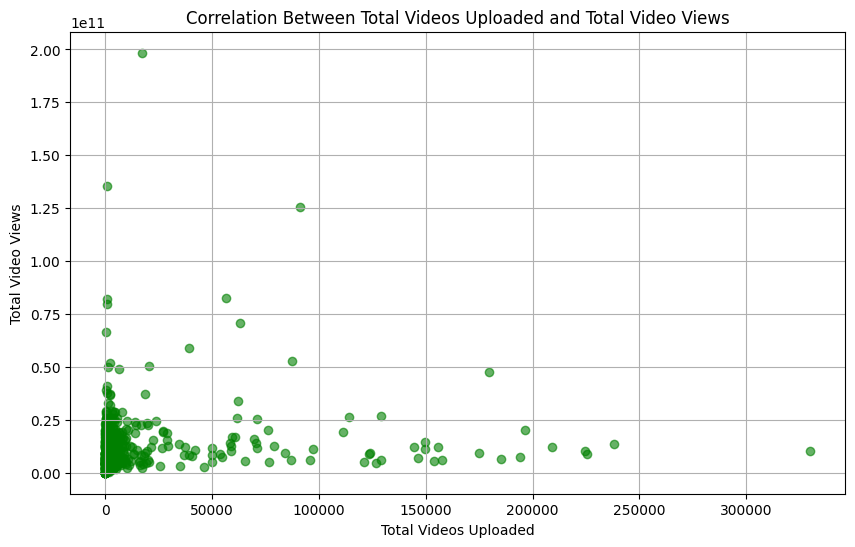

There is a statistically significant correlation between the number of videos uploaded and total video views.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Load the dataset
df = pd.read_excel('/content/sample_data/Project Dataset (1).xlsx')

# Step 2: For each channel
# a. Extract the total number of videos uploaded (correct column name is 'Video count')
df['total_videos'] = df['Video count']

# b. Extract the total number of video views (correct column name is 'Video views')
df['total_views'] = df['Video views']

# Step 3: Perform correlation analysis
# Analyze the correlation between the total number of videos uploaded and total number of video views
correlation, p_value = pearsonr(df['total_videos'], df['total_views'])

# Output the correlation result
print(f'Correlation coefficient between total videos uploaded and total video views: {correlation}')
print(f'P-value of the correlation: {p_value}')

# Step 4: Visualize the correlation using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_videos'], df['total_views'], alpha=0.6, color='g')
plt.title('Correlation Between Total Videos Uploaded and Total Video Views')
plt.xlabel('Total Videos Uploaded')
plt.ylabel('Total Video Views')
plt.grid(True)
plt.show()

# Interpretation of Results
if p_value < 0.05:
    print("There is a statistically significant correlation between the number of videos uploaded and total video views.")
else:
    print("There is no statistically significant correlation between the number of videos uploaded and total video views.")


## Pseudocode, Question 6
 6. Is there a correlation between the category and the total video views?
1. Load the dataset containing channel information (including category and total video views).
2. Group the channels by their category (e.g., Gaming, Music, Education).
3. For each category:
a. Extract the total video views.
b. Calculate the average or total video views for each category.
4. Perform correlation analysis:
a. Analyze the relationship between the category and total video views.
5. Output the correlation result to check for any significant correlation between category and video views.
6. Visualize the correlation using a bar chart or scatter plot:
X-axis: Category.
Y-axis: Total or average video views.
Df = pd.read_csv()
Df[‘subscribers_per_video’] = df[‘subscribers’]/ df[videos]
Outliers = df [(df[‘videos’] < **) > df[‘subscribers].quantile(0.95))]
7. Interpret the results to determine if certain categories are strongly correlated with higher or lower total video views.


Correlation between Category and Video Views: 0.09599179226494343


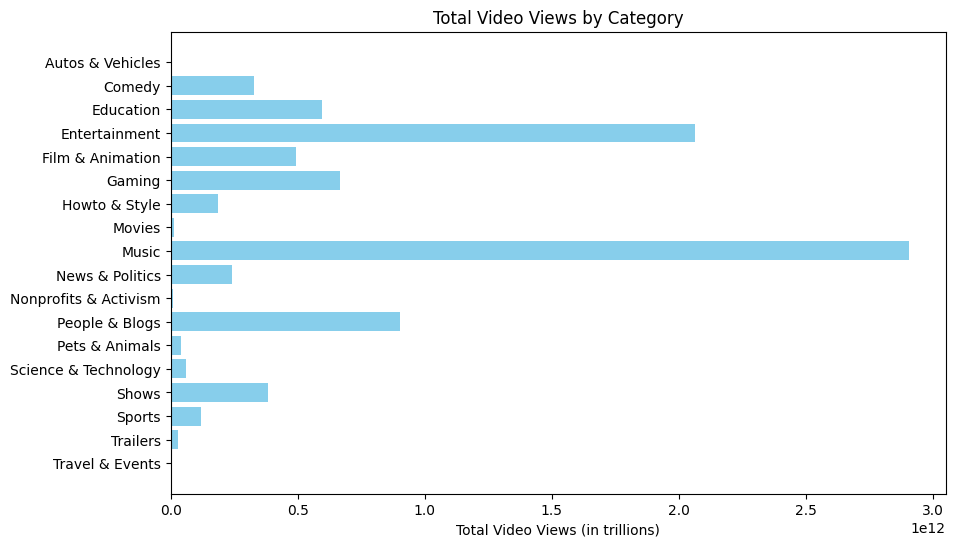

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (make sure to specify the correct file path)
file_path = '/content/sample_data/Project Dataset (1).xlsx'
data = pd.read_excel(file_path)

# Group channels by their category and calculate the total and average video views for each category
category_grouped = data.groupby('Category')['Video views'].agg(['sum', 'mean']).reset_index()

# Convert categories into numerical labels
data['Category_encoded'] = data['Category'].astype('category').cat.codes

# Perform correlation analysis between 'Category_encoded' and 'Video views'
correlation = data[['Category_encoded', 'Video views']].corr()

# Output the correlation result
print("Correlation between Category and Video Views:", correlation.loc['Category_encoded', 'Video views'])

# Bar chart to visualize total video views by category
plt.figure(figsize=(10, 6))
plt.barh(category_grouped['Category'], category_grouped['sum'], color='skyblue')
plt.xlabel('Total Video Views (in trillions)')
plt.title('Total Video Views by Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [25]:
!git remote add origin https://github.com/Lunanru/YouTube-Channel-Rank-Analysis.git
!git branch -M main
!git push -u origin main

error: remote origin already exists.
Enumerating objects: 442, done.
Counting objects: 100% (442/442), done.
Delta compression using up to 4 threads
Compressing objects: 100% (440/440), done.
Writing objects: 100% (442/442), 682.23 MiB | 10.33 MiB/s, done.
Total 442 (delta 71), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (71/71), done.
To https://github.com/Lunanru/YouTube-Channel-Rank-Analysis.git
 * [new branch]      main -> main
branch 'main' set up to track 'origin/main'.
